<a href="https://colab.research.google.com/github/EdMcCarthy-FinanceBook/Financial-Modeling-Textbook/blob/main/SP_Data_and_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set()
plt.rcParams['font.family']= 'serif'
%matplotlib inline

# Task
Analyze historical S&P 500 data by fetching it for the past two years, calculating weekly closing levels and returns, computing annualized volatility, and visualizing the weekly closing levels and annualized volatility with plots. Finally, summarize the observed trends and findings.

## Fetch S&P 500 Data

### Subtask:
Fetch historical S&P 500 index data (ticker '^GSPC') for the past two years using a suitable library like `yfinance`.


**Reasoning**:
The first instruction is to import the `yfinance` library. This is a prerequisite for fetching the S&P 500 data.



In [6]:
import yfinance as yf
print("yfinance imported successfully.")

yfinance imported successfully.


**Reasoning**:
Now that `yfinance` is imported, the next step is to define the ticker, calculate the date range, and download the historical S&P 500 data using `yfinance.download()`, then display the first few rows.



In [7]:
from datetime import datetime, timedelta

ticker_symbol = "^GSPC"

# Calculate the end date as today
end_date = datetime.now()

# Calculate the start date as two years ago from today
start_date = end_date - timedelta(days=2 * 365)

# Fetch historical data
sp500_data = yf.download(ticker_symbol, start=start_date, end=end_date)

print("S&P 500 data fetched successfully.")
print(sp500_data.head())

/tmp/ipython-input-2924211021.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

S&P 500 data fetched successfully.
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2023-12-26  4774.750000  4784.720215  4758.450195  4758.859863  2513910000
2023-12-27  4781.580078  4785.390137  4768.899902  4773.450195  2748450000
2023-12-28  4783.350098  4793.299805  4780.979980  4786.439941  2698860000
2023-12-29  4769.830078  4788.430176  4751.990234  4782.879883  3126060000
2024-01-02  4742.830078  4754.330078  4722.669922  4745.200195  3743050000


**Reasoning**:
The next step is to calculate the weekly closing levels and weekly returns from the fetched daily S&P 500 data. This involves selecting the 'Close' price and then resampling it to a weekly frequency, and then calculating the percentage change to get returns.



In [8]:
weekly_close = sp500_data['Close'].resample('W').last()
weekly_returns = weekly_close.pct_change().dropna()

print("Weekly Closing Levels:")
print(weekly_close.head())
print("\nWeekly Returns:")
print(weekly_returns.head())

Weekly Closing Levels:
Ticker            ^GSPC
Date                   
2023-12-31  4769.830078
2024-01-07  4697.240234
2024-01-14  4783.830078
2024-01-21  4839.810059
2024-01-28  4890.970215

Weekly Returns:
Ticker         ^GSPC
Date                
2024-01-07 -0.015219
2024-01-14  0.018434
2024-01-21  0.011702
2024-01-28  0.010571
2024-02-04  0.013829


## Calculate Annualized Volatility

### Subtask:
Calculate the rolling standard deviation of weekly returns over a 52-week period (approximately one year) and then annualize it.


**Reasoning**:
The subtask requires calculating the rolling standard deviation of weekly returns over a 52-week period and then annualizing it. The first step is to apply the rolling standard deviation and then multiply by the square root of 52 for annualization.



In [9]:
rolling_std_dev = weekly_returns.rolling(window=52).std()
annualized_volatility = rolling_std_dev * np.sqrt(52)

print("Annualized Volatility (first few rows):")
print(annualized_volatility.head())

Annualized Volatility (first few rows):
Ticker      ^GSPC
Date             
2024-01-07    NaN
2024-01-14    NaN
2024-01-21    NaN
2024-01-28    NaN
2024-02-04    NaN


## Plot Weekly Closing Levels

### Subtask:
Generate a line plot to visualize the weekly closing levels of the S&P 500 index.


**Reasoning**:
To visualize the weekly closing levels of the S&P 500 index, I will create a line plot using the `weekly_close` DataFrame with appropriate labels and title, as instructed.



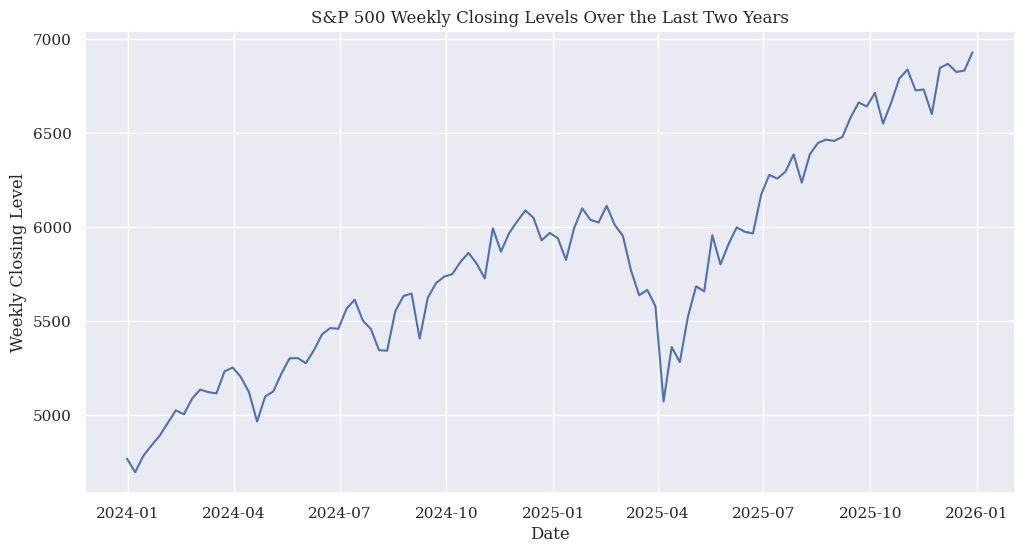

Weekly closing levels plot displayed.


In [11]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_close)
plt.xlabel('Date')
plt.ylabel('Weekly Closing Level')
plt.title('S&P 500 Weekly Closing Levels Over the Last Two Years')
plt.grid(True)
plt.show()
print("Weekly closing levels plot displayed.")

## Plot Annualized Volatility

### Subtask:
Generate a line plot to visualize the annualized volatility of the S&P 500 index. Ensure clear labels and a title.


**Reasoning**:
To visualize the annualized volatility of the S&P 500 index, I will create a line plot using the `annualized_volatility` DataFrame with appropriate labels and title, as instructed.



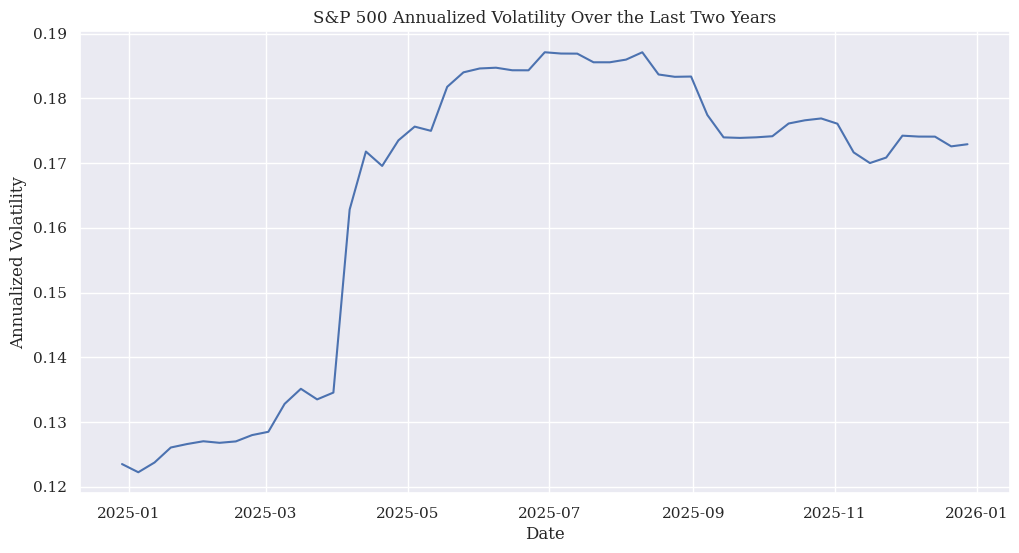

Annualized volatility plot displayed.


In [12]:
plt.figure(figsize=(12, 6))
plt.plot(annualized_volatility)
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.title('S&P 500 Annualized Volatility Over the Last Two Years')
plt.grid(True)
plt.show()
print("Annualized volatility plot displayed.")

## Final Task

### Subtask:
Summarize the findings from the analysis of weekly closing levels and annualized volatility, and briefly discuss the observed trends.


## Summary:

### Data Analysis Key Findings

*   Historical S&P 500 data (ticker `^GSPC`) was successfully fetched for the past two years, and weekly closing levels and corresponding percentage returns were calculated.
*   Annualized volatility was computed by taking the rolling standard deviation of weekly returns over a 52-week period and then annualizing it. This calculation inherently resulted in initial `NaN` values due to the rolling window size.
*   The weekly closing levels of the S&P 500 were visualized, illustrating the overall price movement and trend over the two-year period.
*   The annualized volatility was also plotted, showing its fluctuations and any distinct periods of higher or lower market instability over the same timeframe.

### Insights or Next Steps

*   The analysis successfully established a baseline for understanding S&P 500 performance and risk over the last two years. Further investigation could involve comparing these trends to broader economic indicators or specific market events to identify drivers of change in both closing levels and volatility.
*   To gain deeper insights into volatility patterns, future steps could include segmenting the data to analyze volatility during specific market conditions (e.g., bull vs. bear markets) or exploring different rolling window sizes to observe their impact on the volatility metric.
